In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [26]:
img1 = cv2.imread('/kaggle/input/bus-dan-mobil/mobil.jpg')
img2 = cv2.imread('/kaggle/input/bus-dan-mobil/bus.jpg')

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    

In [27]:
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1_gray, None)
kp2, des2 = sift.detectAndCompute(img2_gray, None)

print("Keypoints mobil:", len(kp1))
print("Keypoints bus:", len(kp2))
sift = cv2.SIFT_create()



Keypoints mobil: 1247
Keypoints bus: 573


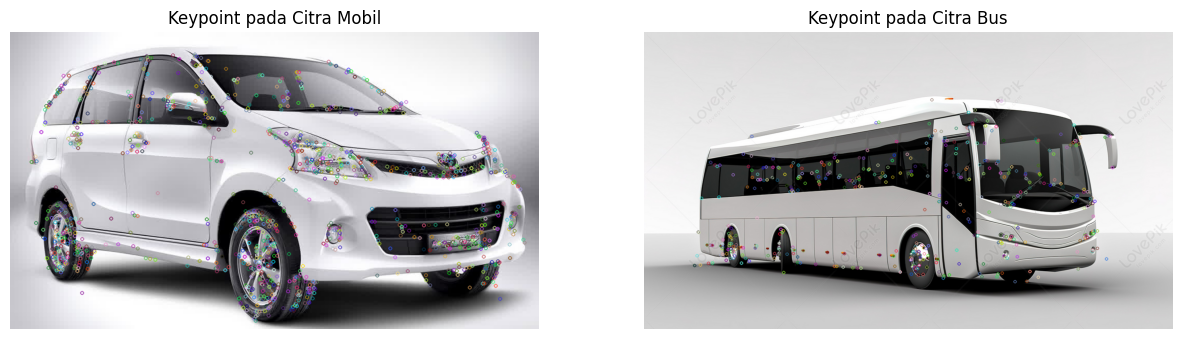

In [28]:
img1_kp = cv2.drawKeypoints(img1, kp1, None)
img2_kp = cv2.drawKeypoints(img2, kp2, None)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img1_kp, cv2.COLOR_BGR2RGB))
plt.title("Keypoint pada Citra Mobil")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2_kp, cv2.COLOR_BGR2RGB))
plt.title("Keypoint pada Citra Bus")
plt.axis("off")

plt.show()


In [29]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)


(np.float64(-0.5), np.float64(2223.5), np.float64(672.5), np.float64(-0.5))

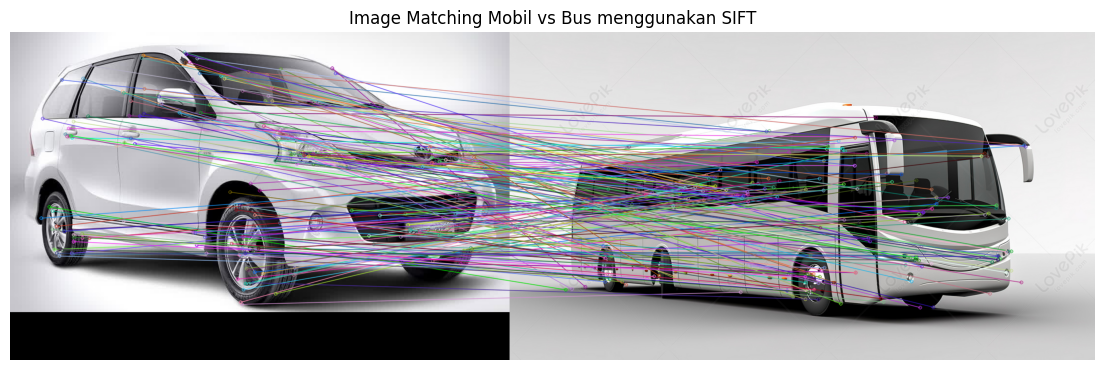

In [30]:
img_match = cv2.drawMatches(img1, kp1, img2, kp2, matches[:573], None, flags=2)

plt.figure(figsize=(14,8))
plt.imshow(cv2.cvtColor(img_match, cv2.COLOR_BGR2RGB))
plt.title("Image Matching Mobil vs Bus menggunakan SIFT")
plt.axis('off')
